In [328]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import hmean
import os

sys.path.append('/orions4-zfs/projects/lins2/Panos_Space/Git_Repos')

from geo_tool import Point_Cloud

from geo_tool.in_out.soup import load_crude_point_cloud

from tf_lab.fundamentals.utils import set_visible_GPUs
GPU = 2
set_visible_GPUs([GPU])

In [329]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [567]:
chair_rotate_degrees = [-45,-150,-135,-115,-110, 0, -25, -10, 90, -30, -130, -45, -135, 90, 90, 60, 0]
obj_list = ['chair_scan_0001_2048_samples_pts.txt', 'chair_scan_0010_2048_samples_pts.txt', 'chair_scan_0016_2048_samples_pts.txt', 'chair_scan_0007_2048_samples_pts.txt', 'chair_scan_0011_2048_samples_pts.txt', 'chair_scan_0006_2048_samples_pts.txt', 'chair_scan_0017_2048_samples_pts.txt', 'chair_scan_0012_2048_samples_pts.txt', 'chair_scan_0008_2048_samples_pts.txt', 'chair_scan_0003_2048_samples_pts.txt', 'chair_scan_0005_2048_samples_pts.txt', 'chair_scan_0014_2048_samples_pts.txt', 'chair_scan_0002_2048_samples_pts.txt', 'chair_scan_0009_2048_samples_pts.txt', 'chair_scan_0013_2048_samples_pts.txt', 'chair_scan_0015_2048_samples_pts.txt', 'chair_scan_0004_2048_samples_pts.txt']
obj2degree = {}
for idx, de in enumerate(chair_rotate_degrees):
    obj2degree[obj_list[idx]] = de

In [568]:
table_rotate_degrees = [30, -70, 90, -80, 0, 10, 120, -10, 30, 0 , 30, 10 , 10, 60, 25, 35, 10, 0]
obj_list = ['table_scan_0014_2048_samples_pts.txt', 'table_scan_0005_2048_samples_pts.txt', 'table_scan_0003_2048_samples_pts.txt', 'table_scan_0012_2048_samples_pts.txt', 'table_scan_0008_2048_samples_pts.txt', 'table_scan_0004_2048_samples_pts.txt', 'table_scan_0015_2048_samples_pts.txt', 'table_scan_0009_2048_samples_pts.txt', 'table_scan_0013_2048_samples_pts.txt', 'table_scan_0018_2048_samples_pts.txt', 'table_scan_0002_2048_samples_pts.txt', 'table_scan_0007_2048_samples_pts.txt', 'table_scan_0016_2048_samples_pts.txt', 'table_scan_0010_2048_samples_pts.txt', 'table_scan_0001_2048_samples_pts.txt', 'table_scan_0017_2048_samples_pts.txt', 'table_scan_0006_2048_samples_pts.txt', 'table_scan_0011_2048_samples_pts.txt']
obj2degree = {}
for idx, de in enumerate(table_rotate_degrees):
    obj2degree[obj_list[idx]] = de

In [569]:
sofa_rotate_degrees =[0, 0, 100, -130, 10, -65, 60, -35, 60, 155, 120, 110, 70, 10, 0, 120, 67, 5, 5, 30, 0, 120, 5, 110, -83, -150 ]
obj_list = ['sofa_scan_0007_2048_samples_pts.txt', 'sofa_scan_0016_2048_samples_pts.txt', 'sofa_scan_0025_2048_samples_pts.txt', 'sofa_scan_0023_2048_samples_pts.txt', 'sofa_scan_0010_2048_samples_pts.txt', 'sofa_scan_0001_2048_samples_pts.txt', 'sofa_scan_0017_2048_samples_pts.txt', 'sofa_scan_0006_2048_samples_pts.txt', 'sofa_scan_0024_2048_samples_pts.txt', 'sofa_scan_0022_2048_samples_pts.txt', 'sofa_scan_0011_2048_samples_pts.txt', 'sofa_scan_0014_2048_samples_pts.txt', 'sofa_scan_0005_2048_samples_pts.txt', 'sofa_scan_0003_2048_samples_pts.txt', 'sofa_scan_0019_2048_samples_pts.txt', 'sofa_scan_0012_2048_samples_pts.txt', 'sofa_scan_0008_2048_samples_pts.txt', 'sofa_scan_0021_2048_samples_pts.txt', 'sofa_scan_0026_2048_samples_pts.txt', 'sofa_scan_0004_2048_samples_pts.txt', 'sofa_scan_0015_2048_samples_pts.txt', 'sofa_scan_0009_2048_samples_pts.txt', 'sofa_scan_0013_2048_samples_pts.txt', 'sofa_scan_0018_2048_samples_pts.txt', 'sofa_scan_0002_2048_samples_pts.txt', 'sofa_scan_0020_2048_samples_pts.txt']
obj2degree = {}
for idx, de in enumerate(table_rotate_degrees):
    obj2degree[obj_list[idx]] = de

In [570]:
class_name = 'table'
obj_root_path = '/orions4-zfs/projects/lins2/Panos_Space/DATA/Charles_Real_Scans/objects/'+class_name
obj_list = [line for line in os.listdir(obj_root_path) if line.endswith('_pts.txt')]
obj_name = [line.strip().split('2048_samples_pts.txt')[0] for line in obj_list]

udf_root_path = '/orions4-zfs/projects/lins2/Lin_Virtual/Data/FromRealScanData/'
print len(obj_name)
print obj_list
crude_pc_list = []

18
['table_scan_0014_2048_samples_pts.txt', 'table_scan_0005_2048_samples_pts.txt', 'table_scan_0003_2048_samples_pts.txt', 'table_scan_0012_2048_samples_pts.txt', 'table_scan_0008_2048_samples_pts.txt', 'table_scan_0004_2048_samples_pts.txt', 'table_scan_0015_2048_samples_pts.txt', 'table_scan_0009_2048_samples_pts.txt', 'table_scan_0013_2048_samples_pts.txt', 'table_scan_0018_2048_samples_pts.txt', 'table_scan_0002_2048_samples_pts.txt', 'table_scan_0007_2048_samples_pts.txt', 'table_scan_0016_2048_samples_pts.txt', 'table_scan_0010_2048_samples_pts.txt', 'table_scan_0001_2048_samples_pts.txt', 'table_scan_0017_2048_samples_pts.txt', 'table_scan_0006_2048_samples_pts.txt', 'table_scan_0011_2048_samples_pts.txt']


In [408]:
crude_pc_list = [ load_crude_point_cloud(os.path.join(obj_root_path,obj_list[i]),permute=[2,0,1]) for i in xrange(len(obj_list))]

In [560]:
pc_rotate_degrees =  [30, -70, 90, -80, 0, 10, 120, -10, 30, 0 , 30, 10 , 10, 60, 25, 35, 10, 0]
model_id = len(pc_rotate_degrees) - 1
print obj_name[model_id]

table_scan_0011_


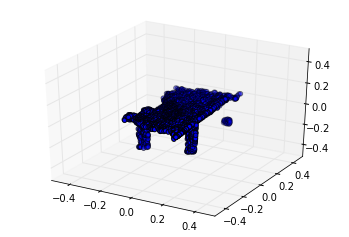

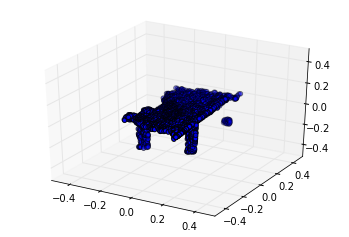

In [561]:
pc_in = Point_Cloud(crude_pc_list[model_id]).rotate_z_axis_by_degrees(pc_rotate_degrees[model_id])
pc_in.plot(in_u_sphere=True)

In [562]:
print(pc_in.points.shape)
print(obj_name[model_id])
pc_in = pc_in.points.reshape([-1,2048,3])
print(pc_in.shape)

(2048, 3)
table_scan_0011_
(1, 2048, 3)


In [563]:
pred_df_ = sess.run(pred_df,feed_dict={pcs:pc_in})

In [564]:
df_saver(os.path.join(udf_root_path,'Sofa',obj_name[model_id]+'_df.txt'),pred_df_[0])

In [211]:
import tensorflow as tf
BASE_DIR = '/orions4-zfs/projects/lins2/Lin_Virtual'
sys.path.append(BASE_DIR)
sys.path.append(os.path.join(BASE_DIR,'Models'))
sys.path.append(os.path.join(BASE_DIR,'Utils'))

from df_loader import df_saver
from pc2df_model import pc2df

In [12]:
pcs = tf.placeholder("float",[None,2048,3 ])
pred_df = pc2df(pcs)

saver = tf.train.Saver()
init_op = tf.initialize_all_variables()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

saver_dir = '/orions4-zfs/projects/lins2/Lin_Virtual/Data/SavedModel/PC2DF_All/'

sess = tf.Session(config=config)
sess.run(init_op)
new_saver = tf.train.import_meta_graph(os.path.join(saver_dir,'-15.meta'))
epoch_id = 97
new_saver.restore(sess, os.path.join(saver_dir,'-'+str(epoch_id)))

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [14]:
print(np.sum(pred_df_))  #79286.8
print(obj_name[model_id])

90475.3
sofa_scan_0007_


In [55]:
incomplete_n_samples = 2048
complete_n_samples = 4096

from_manifold = False

GPU = 3

class_type = raw_input('Give me the class type.\n').lower()
class_syn_id = shape_net_category_to_synth_id()[class_type]

loss = 'emd'

experiment_id, best_epoch = paper_pc_completion_experiment_id_best_epoch(class_type, loss)

load_model_conf = True
do_evaluation = True

experiment_name = str(experiment_id) + '_' + class_type + '_' + str(incomplete_n_samples) + '_' \
                  + str(complete_n_samples) + 'pts_' + loss

top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
train_dir = osp.join(top_data_dir, 'OUT/models/incomplete_pclouds/paper_vanilla_vscan')
train_dir = osp.join(train_dir, experiment_name)

Give me the class type.
chair


In [59]:
if load_model_conf:
    conf = Conf.load(osp.join(train_dir, 'configuration'))
    conf.consistent_io = None
    conf.encoder_args = {'dropout_prob': 1.0}
    print conf
else:
    decoder_args = {'layer_sizes': [1024, np.prod(n_output)],
                    'non_linearity': tf.nn.relu
                   }

    encoder_args = {'dropout_prob': 0.5}
    
    conf = Conf(
                n_input = n_input,
                n_output = n_output,
                denoising = True,
                training_epochs = max_training_epochs,
                batch_size = 50,
                loss = loss,
                train_dir = train_dir,
                loss_display_step = 1,
                saver_step = 2,
                learning_rate = 0.0005,
                encoder = enc_dec.encoder_with_convs_and_symmetry,
                encoder_args = encoder_args,
                decoder = enc_dec.decoder_with_fc_only,
                decoder_args = decoder_args
               )
    
    conf.experiment_name = experiment_name
    conf.save(osp.join(conf.train_dir, 'configuration'))
    
reset_tf_graph()
set_visible_GPUs([GPU])

ae = PointNetAutoEncoder(experiment_name, conf)

                    batch_size: 50
                 consistent_io: None
                         debug: False
                       decoder: decoder_with_fc_only
                  decoder_args: {'non_linearity': <function relu at 0x7fdfdb008758>, 'layer_sizes': [1024, 12288]}
                       encoder: encoder_with_convs_and_symmetry
                  encoder_args: {'dropout_prob': 1.0}
               experiment_name: 2_chair_2048_4096pts_emd
                 gauss_augment: None
                  is_denoising: True
               latent_vs_recon: 1.0
                 learning_rate: 0.0005
                          loss: emd
             loss_display_step: 1
                       n_input: [2048, 3]
                      n_output: [4096, 3]
                           n_z: None
             saver_max_to_keep: None
                    saver_step: 2
                     train_dir: /orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/incomplete_pclouds/paper_vanilla_vscan/2_chair_2

InternalError: Dst tensor is not initialized.
	 [[Node: 2_chair_2048_4096pts_emd_1/zeros_32 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [1024,12288] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op u'2_chair_2048_4096pts_emd_1/zeros_32', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/orions4-zfs/projects/lins2/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-527c02ef4e8b>", line 36, in <module>
    ae = PointNetAutoEncoder(experiment_name, conf)
  File "/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/tf_lab/point_clouds/point_net_ae.py", line 52, in __init__
    self._create_loss_optimizer()
  File "/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/tf_lab/point_clouds/point_net_ae.py", line 86, in _create_loss_optimizer
    self.optimizer = tf.train.AdamOptimizer(learning_rate=c.learning_rate).minimize(self.loss)   # rename to train_step
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/optimizer.py", line 279, in minimize
    name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/optimizer.py", line 393, in apply_gradients
    self._create_slots(var_list)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/adam.py", line 119, in _create_slots
    self._zeros_slot(v, "m", self._name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/optimizer.py", line 593, in _zeros_slot
    named_slots[var] = slot_creator.create_zeros_slot(var, op_name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/slot_creator.py", line 106, in create_zeros_slot
    val = array_ops.zeros(primary.get_shape().as_list(), dtype=dtype)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/array_ops.py", line 1437, in zeros
    output = constant(zero, shape=shape, dtype=dtype, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/constant_op.py", line 169, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Dst tensor is not initialized.
	 [[Node: 2_chair_2048_4096pts_emd_1/zeros_32 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [1024,12288] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [40]:
# Evaluate Minhyuk
testing_data = pc_in
ae.restore_model(conf.train_dir, best_epoch, verbose=True) 
top_save_dir = osp.join(conf.train_dir, 'output', 'epoch_' + str(best_epoch))
save_dir = osp.join(top_save_dir, 'test_predictions')    

test_recon, test_loss, test_feed, test_ids, test_gt = ae.evaluate(testing_data, conf)

# Report Accuracy and Coverage of test data.
n_examples = len(test_recon)
pred_scores = np.zeros((n_examples, 2))
for i in xrange(n_examples):    
    gt = test_gt[i]
    pred = test_recon[i]    
    pred_scores[i, 0] = accuracy_of_completion(pred, gt, thres=0.02, ret_dists=False)
    pred_scores[i, 1] = coverage_of_completion(gt, pred, thres=0.02, ret_dists=False)

print 'Test Mean-Median Accuracy:', np.mean(pred_scores[:, 0]), np.median(pred_scores[:, 0])
print 'Test Mean-Median Coverage:', np.mean(pred_scores[:, 1]), np.median(pred_scores[:, 1])

NameError: name 'ae' is not defined

In [70]:
pc = np.array(crude_pc_list[model_id])
print pc.shape[0]

2048


(2048, 4)
(2048, 3)


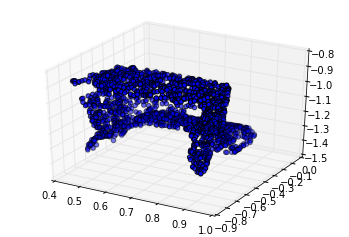

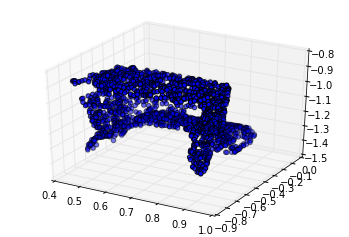

In [71]:
temp = np.ones([pc.shape[0],pc.shape[1]+1])
temp[:,0:3] = pc

print temp.shape
T = np.array([-0.420127,0.000000,0.907466,0.688095,0.000000,1.000000,0.000000,-0.497587,-0.907466,0.000000,-0.420127,-1.116408
,0.000000,0.000000,0.000000,1.000000]).reshape([4,4])

tmp_pc = T.dot(temp.T).T

new_pc = tmp_pc[:,0:3]
print new_pc.shape
pc_in = Point_Cloud(new_pc)
pc_in.plot()